In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
from sklearn.neighbors import KDTree
from tqdm.autonotebook import tqdm
import seaborn as sns
from scipy.spatial import distance

<ipython-input-2-614c3e28061e>:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
%config InlineBackend.figure_format = 'retina'

In [4]:
sns.set_theme(context='notebook', style='white')

In [5]:
n = 15

In [6]:
np.random.seed(123)
x = np.random.uniform(low=0, high=1, size=n)
y = np.random.uniform(low=0, high=1, size=n)

In [7]:
df_uniform = pd.DataFrame({'x': x, 'y': y})
df_uniform

,x,y
0,0.696469,0.737995
1,0.286139,0.182492
2,0.226851,0.175452
3,0.551315,0.531551
4,0.719469,0.531828
5,0.423106,0.634401
6,0.980764,0.849432
7,0.684830,0.724455
8,0.480932,0.611024
9,0.392118,0.722443


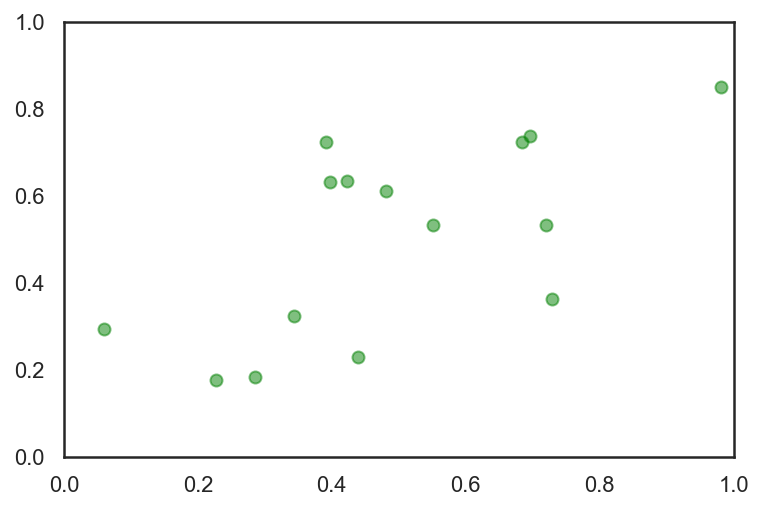

In [8]:
fig, ax = plt.subplots()
ax.scatter(x=x, y=y, alpha=0.5, color='green');
    
ax.set_xlim(0, 1)
ax.set_ylim(0, 1);

In [9]:
np.random.seed(1234)
mu_array = np.array([[0.25, 0.75], [0.75, 0.75], [0.75, 0.25]])
sigma = 0.05
n_cluster = 3

cluster = np.random.randint(n_cluster, size=n)

x = []
y = []

for i in range(n_cluster):
    n_cluster_i = np.sum(cluster == i)
    x_cluster = np.random.normal(loc=mu_array[i, 0], scale=sigma, size=n_cluster_i)
    y_cluster = np.random.normal(loc=mu_array[i, 1], scale=sigma, size=n_cluster_i)
    x += list(x_cluster)
    y += list(y_cluster)

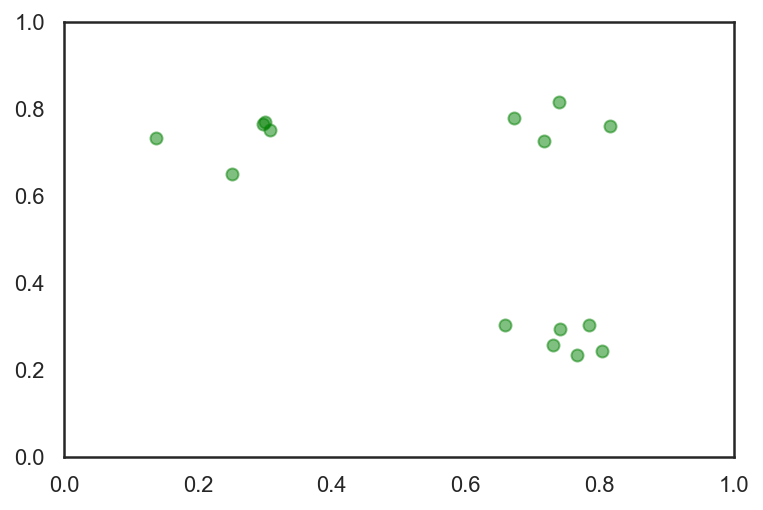

In [10]:
fig, ax = plt.subplots()
ax.scatter(x=x, y=y, alpha=0.5, color='green');
    
ax.set_xlim(0, 1)
ax.set_ylim(0, 1);

In [11]:
df_cluster = pd.DataFrame({'x': x, 'y': y})
df_cluster

,x,y
0,0.250785,0.648937
1,0.137866,0.733296
2,0.307502,0.750106
3,0.299597,0.770273
4,0.297666,0.764455
5,0.816058,0.759671
6,0.672655,0.777672
7,0.739868,0.815908
8,0.717202,0.726535
9,0.783778,0.302379


In [12]:
df_cluster.x.values

array([0.25078482, 0.13786575, 0.30750179, 0.2995973 , 0.29766621,
       0.81605791, 0.67265472, 0.73986768, 0.71720153, 0.7837777 ,
       0.65914864, 0.74084457, 0.80294846, 0.73010799, 0.76687188])

In [14]:
minimum_dist = []
for i, point in df_uniform.iterrows():
    dist = []
    print(i)
    for j, other in df_uniform.iterrows():
        if i != j:
            d  = np.sqrt((point.x - other.x)**2+(point.y - other.y)**2)
            dist.append(d)
    
    min_dist = np.min(dist)
    print('minimum distance', min_dist)
    minimum_dist.append(min_dist)

0
minimum distance 0.017855265799546667
1
minimum distance 0.05970438943235716
2
minimum distance 0.05970438943235716
3
minimum distance 0.10615822429106256
4
minimum distance 0.16815442755906457
5
minimum distance 0.025295130002403833
6
minimum distance 0.30535507682526947
7
minimum distance 0.017855265799546667
8
minimum distance 0.06237216316239623
9
minimum distance 0.09165907281908077
10
minimum distance 0.13441477303686084
11
minimum distance 0.1703086279374544
12
minimum distance 0.13441477303686084
13
minimum distance 0.20477540730759322
14
minimum distance 0.025295130002403833


In [47]:
n_bins = 15
minimum_dist_hist, x_hist = np.histogram(minimum_dist, bins=n_bins, range=(0, 1))

In [48]:
cum_sum = 0
minimum_dist_cum = np.zeros(n_bins)
for i in range(n_bins):
    cum_sum += minimum_dist_hist[i]
    minimum_dist_cum[i] = cum_sum

In [49]:
step = x_hist[1] - x_hist[0]

In [50]:
x_hist[0]

0.0

In [51]:
np.arange(n_bins)*step/2+x_hist[0]

array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
       0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667])

<BarContainer object of 10 artists>

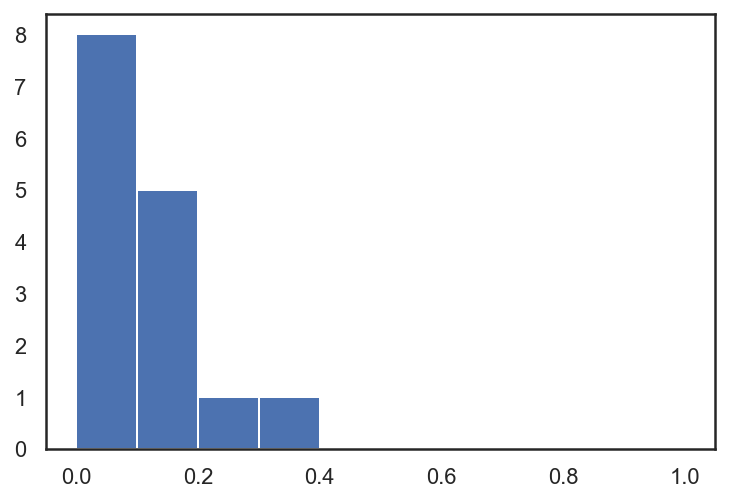

In [40]:
plt.bar(x=x_hist[:-1], width=step, align='edge', height=minimum_dist_hist)

Text(0, 0.5, 'cumulative freq')

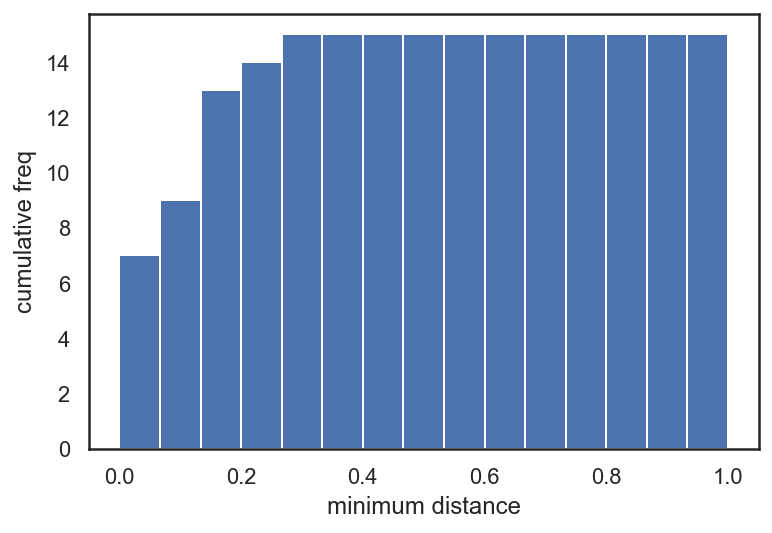

In [53]:
fig, ax = plt.subplots()
ax.bar(x=x_hist[:-1], width=step, align='edge', height=minimum_dist_cum)
ax.set_xlabel('minimum distance')
ax.set_ylabel('cumulative freq')

### cumulative distribution of minimal distance 

In [20]:
x_hist[:-1]

array([0.01785527, 0.04660525, 0.07535523, 0.10410521, 0.13285519,
       0.16160517, 0.19035515, 0.21910513, 0.24785511, 0.2766051 ])

# Play around

In [111]:
mu = 0
sigma = 1

In [112]:
x = np.linspace(-3, 3, 100)
x

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

In [38]:
y = scipy.stats.norm(loc=mu, scale=sigma).pdf(x)
y

array([0.00443185, 0.00530579, 0.00632878, 0.00752133, 0.00890582,
       0.0105065 , 0.01234943, 0.01446241, 0.01687483, 0.01961746,
       0.02272223, 0.02622189, 0.03014961, 0.03453857, 0.03942137,
       0.0448295 , 0.05079264, 0.05733801, 0.06448952, 0.07226707,
       0.08068571, 0.08975477, 0.09947714, 0.10984842, 0.12085626,
       0.13247967, 0.14468855, 0.15744319, 0.17069405, 0.18438164,
       0.1984366 , 0.21277993, 0.22732351, 0.24197072, 0.2566174 ,
       0.27115285, 0.28546117, 0.29942268, 0.31291556, 0.3258175 ,
       0.33800759, 0.34936814, 0.35978656, 0.36915722, 0.37738323,
       0.38437808, 0.3900672 , 0.39438923, 0.39729716, 0.39875915,
       0.39875915, 0.39729716, 0.39438923, 0.3900672 , 0.38437808,
       0.37738323, 0.36915722, 0.35978656, 0.34936814, 0.33800759,
       0.3258175 , 0.31291556, 0.29942268, 0.28546117, 0.27115285,
       0.2566174 , 0.24197072, 0.22732351, 0.21277993, 0.1984366 ,
       0.18438164, 0.17069405, 0.15744319, 0.14468855, 0.13247

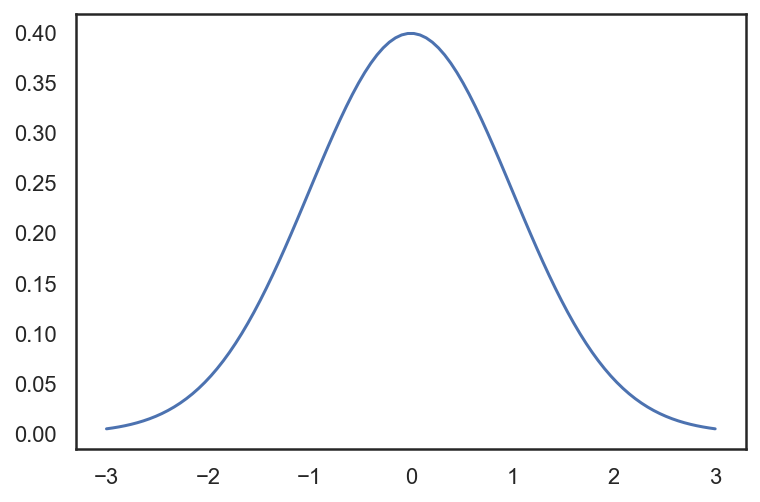

In [39]:
plt.plot(x, y)

In [54]:
x = np.random.normal(loc=mu, scale=sigma, size=100)

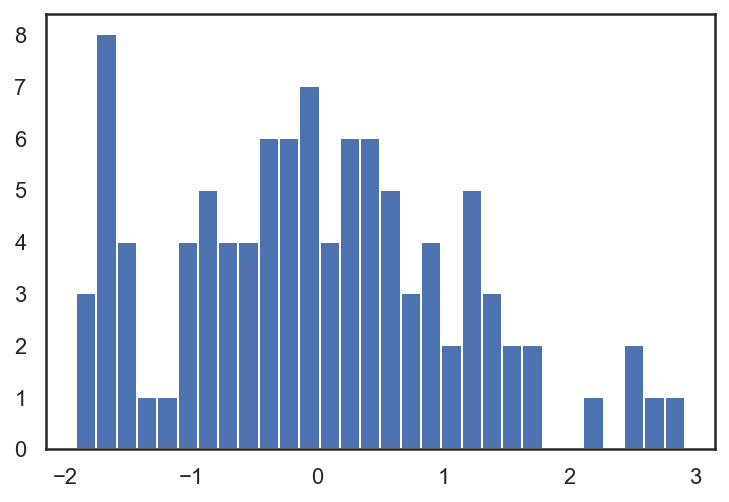

In [55]:
plt.hist(x, bins=30);